Exploratory Analysis with Plots and Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

For the first Question related to Insurance

In [2]:
insurance = pd.read_csv('insurance.csv')

insurance.head

<bound method NDFrame.head of       age  gender     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [3]:
insurance_df = insurance.groupby(['region'])[['charges']]

insurance_df.sum().sort_values('charges', ascending=False)

,charges
region,
southeast,5.363690e+06
northeast,4.343669e+06
northwest,4.035712e+06
southwest,4.012755e+06


So the region that has paid the most charges is Southeast with the value of 5.464690e+06

In [4]:
insurance.groupby(['gender','children'])[['charges']].mean('charges')

charges
gender children              
female 0         11905.714276
       1         12161.360414
       2         13941.317326
       3         13865.605066
       4         13937.674562
       5          9854.006419
male   0         12832.696736
       1         13273.522458
       2         16187.095325
       3         16789.167419
       4         13782.284829
       5          7931.658310

So, female with 2 children are paying 13941.32 as their mean charge which is highest among female while male with 3 children are paying the highest with 16789.17.

In [5]:
insurance.groupby(['smoker'])[['charges']].mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [6]:
from scipy import stats

smoker_yes = insurance[insurance.smoker == 'yes'].charges
smoker_no = insurance[insurance.smoker == 'no'].charges

stats.ttest_ind(smoker_yes,smoker_no)

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283)

From the above table we see that smokers pay a lot more than none somkers in average which is also statistically significant from the T-test.

In [7]:
insurance.groupby('region')[['age','charges']].corr()

age   charges
region                               
northeast age      1.000000  0.300951
          charges  0.300951  1.000000
northwest age      1.000000  0.337654
          charges  0.337654  1.000000
southeast age      1.000000  0.310593
          charges  0.310593  1.000000
southwest age      1.000000  0.258358
          charges  0.258358  1.000000

So, Northwest is the region which has the highest correlation between age and charges

In [8]:
bmi_bin = [-0.01, 18.5, 24.9, np.inf]
bmi_label = [0, 1, 0]

insurance['healthy'] = pd.cut (insurance['bmi'], bmi_bin, labels=bmi_label, ordered=False)

insurance.head

<bound method NDFrame.head of       age  gender     bmi  children smoker     region      charges healthy
0      19  female  27.900         0    yes  southwest  16884.92400       0
1      18    male  33.770         1     no  southeast   1725.55230       0
2      28    male  33.000         3     no  southeast   4449.46200       0
3      33    male  22.705         0     no  northwest  21984.47061       1
4      32    male  28.880         0     no  northwest   3866.85520       0
...   ...     ...     ...       ...    ...        ...          ...     ...
1333   50    male  30.970         3     no  northwest  10600.54830       0
1334   18  female  31.920         0     no  northeast   2205.98080       0
1335   18  female  36.850         0     no  southeast   1629.83350       0
1336   21  female  25.800         0     no  southwest   2007.94500       0
1337   61  female  29.070         0    yes  northwest  29141.36030       0

[1338 rows x 8 columns]>

In [9]:
insurance.healthy.value_counts()

0    1117
1     221
Name: healthy, dtype: int64

There are 1117 unhealthy and 221 healthy people according to their BMI.

In [10]:
insurance.groupby(['healthy'])[['charges']].mean()

,charges
healthy,
0,13837.369805
1,10404.900084


The mean charges for unhealthy people are higher on average as compared to those who are healthy.

In [11]:
healthy_yes = insurance[insurance.healthy == 1].charges
healthy_no = insurance[insurance.healthy == 0].charges

stats.ttest_ind(healthy_yes, healthy_no)

Ttest_indResult(statistic=-3.870037200749794, pvalue=0.0001140687768374698)

From the T-test, we see that there is a significant level of people who are paying higher when they are unhealthy as compared to healthy.

For question 2 related to customer

In [12]:
marketing1 = pd.read_csv('marketing_demographics.csv')
marketing2 = pd.read_csv('marketing_business.csv')

marketing = pd.merge(marketing1,marketing2, on='ID')
marketing

,ID,Education,Marital_Status,Income,Country,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response
0,0,Graduation,Married,70951.0,SA,37,0,1198,16,3,13,0,1,0,0
1,1,Graduation,Single,57091.0,CA,61,0,577,17,7,10,1,5,0,1
2,9,Master,Single,46098.0,CA,47,2,120,7,3,4,0,8,0,0
3,13,PhD,Widow,25358.0,SA,75,1,32,4,1,3,0,6,0,0
4,17,PhD,Married,60491.0,SP,51,1,1028,24,6,18,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1,32,4,1,3,0,7,0,0
2212,11181,PhD,Married,156924.0,CA,73,0,8,0,0,0,0,0,0,0
2213,11187,Basic,Single,26487.0,CA,44,1,69,6,2,4,0,5,0,0
2214,11188,Graduation,Together,26091.0,SP,65,2,89,6,2,4,0,5,0,0


In [13]:
marketing['interactions']=marketing['Total_Purchase']+marketing['Accepted_Campaigns']+marketing['Website_Visit']+marketing['Complaint']+marketing['Response']
marketing['Average_Spend'] = marketing['Total_Amount']/marketing['Total_Purchase']
marketing['Average_Spend'].replace([np.inf], 0, inplace=True)

marketing

,ID,Education,Marital_Status,Income,Country,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response,interactions,Average_Spend
0,0,Graduation,Married,70951.0,SA,37,0,1198,16,3,13,0,1,0,0,17,74.875000
1,1,Graduation,Single,57091.0,CA,61,0,577,17,7,10,1,5,0,1,24,33.941176
2,9,Master,Single,46098.0,CA,47,2,120,7,3,4,0,8,0,0,15,17.142857
3,13,PhD,Widow,25358.0,SA,75,1,32,4,1,3,0,6,0,0,10,8.000000
4,17,PhD,Married,60491.0,SP,51,1,1028,24,6,18,0,5,0,0,29,42.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1,32,4,1,3,0,7,0,0,11,8.000000
2212,11181,PhD,Married,156924.0,CA,73,0,8,0,0,0,0,0,0,0,0,0.000000
2213,11187,Basic,Single,26487.0,CA,44,1,69,6,2,4,0,5,0,0,11,11.500000
2214,11188,Graduation,Together,26091.0,SP,65,2,89,6,2,4,0,5,0,0,11,14.833333


In [14]:
marketing_bin = (-0.01, 25000, 50000, 75000, 100000, np.inf)
marketing_label = ('Less than 25000', '25000-50000', '50000-75000', '75000-100000', 'More than 100000')

marketing['Income_Range'] = pd.cut (marketing['Income'], marketing_bin, labels=marketing_label)

marketing

,ID,Education,Marital_Status,Income,Country,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response,interactions,Average_Spend,Income_Range
0,0,Graduation,Married,70951.0,SA,37,0,1198,16,3,13,0,1,0,0,17,74.875000,50000-75000
1,1,Graduation,Single,57091.0,CA,61,0,577,17,7,10,1,5,0,1,24,33.941176,50000-75000
2,9,Master,Single,46098.0,CA,47,2,120,7,3,4,0,8,0,0,15,17.142857,25000-50000
3,13,PhD,Widow,25358.0,SA,75,1,32,4,1,3,0,6,0,0,10,8.000000,25000-50000
4,17,PhD,Married,60491.0,SP,51,1,1028,24,6,18,0,5,0,0,29,42.833333,50000-75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1,32,4,1,3,0,7,0,0,11,8.000000,25000-50000
2212,11181,PhD,Married,156924.0,CA,73,0,8,0,0,0,0,0,0,0,0,0.000000,More than 100000
2213,11187,Basic,Single,26487.0,CA,44,1,69,6,2,4,0,5,0,0,11,11.500000,25000-50000
2214,11188,Graduation,Together,26091.0,SP,65,2,89,6,2,4,0,5,0,0,11,14.833333,25000-50000


Adding columns for interactions, Income Range and Average Spend.

Interactions are the total purchase, website visit, complaint and if they have responded to the recent marketing.

Income range is set as Less than 25,000; 25,000=50,000; 50,000=75,000; 75,000-100,000; and More than 100,000.

Average spend is the total amount divided by total purchase.

<AxesSubplot:xlabel='Income_Range', ylabel='interactions'>

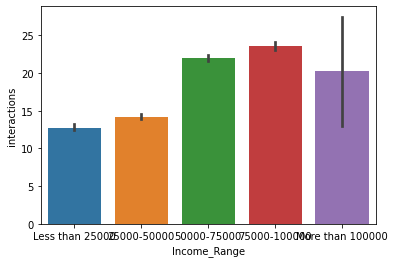

In [15]:
sns.barplot(x=marketing['Income_Range'], y=marketing['interactions'], order=marketing_label, )

From the bar graph we can see that people with income range between 50,000 to 100,000 are the ones who are interacting the most with the website also with more than 100,000 are close behind.

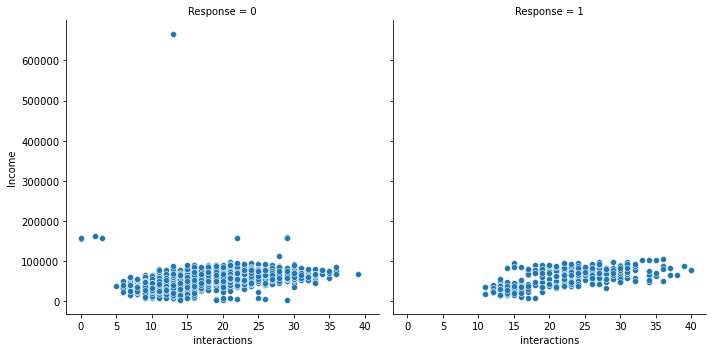

In [16]:
sns.relplot (x = marketing['interactions'], y=marketing['Income'],  kind='scatter', col=marketing['Response'])

From this graph we can see that people who have recently responded to the campaign have had more minimum interaction and also have more interaction in the higher range which proves that those who are responding with the promotion are more likely to interact more as well.

<AxesSubplot:xlabel='Country', ylabel='Total_Amount'>

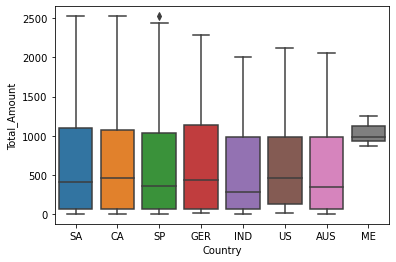

In [17]:
sns.boxplot (x=marketing['Country'], y=marketing['Total_Amount'])

<AxesSubplot:xlabel='Country', ylabel='Total_Purchase'>

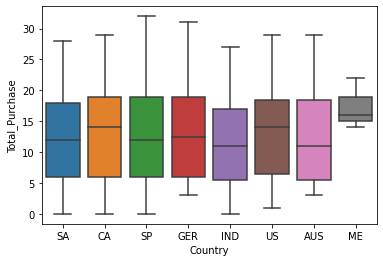

In [18]:
sns.boxplot (x=marketing['Country'], y=marketing['Total_Purchase'])

From the above graph we see that ME(Middle Eastern) countries are paying more from the lower range. While the maximum spend can be seen in Spain and Germany while the median spend is more in US and Canada as compared to the higher spending companies.

<AxesSubplot:xlabel='Country', ylabel='Total_Amount'>

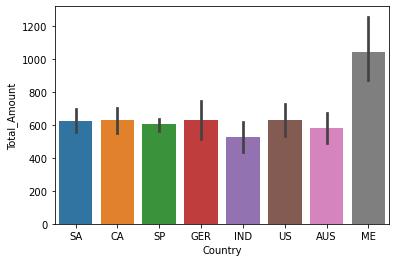

In [19]:
sns.barplot(x=marketing['Country'], y=marketing['Total_Amount'])

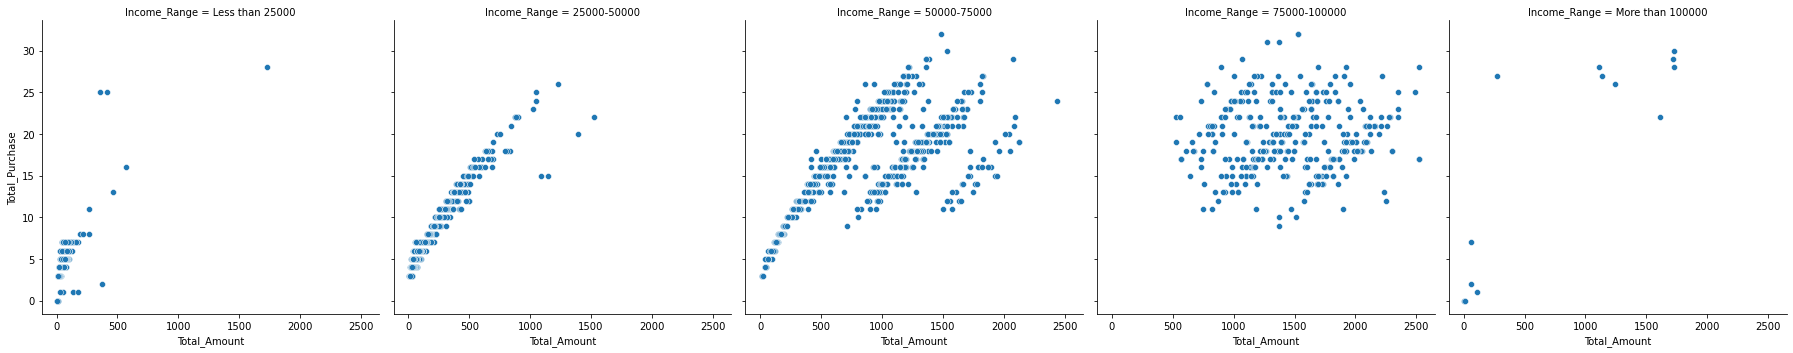

In [20]:
sns.relplot (x=marketing['Total_Amount'], y=marketing['Total_Purchase'], kind='scatter', col=marketing['Income_Range'])

We can see that at the income increase the spend is also increasing accordingly and that the number of purchase and the amount of purchase are also closely related from the above diagram

<AxesSubplot:xlabel='Total_Amount', ylabel='Income_Range'>

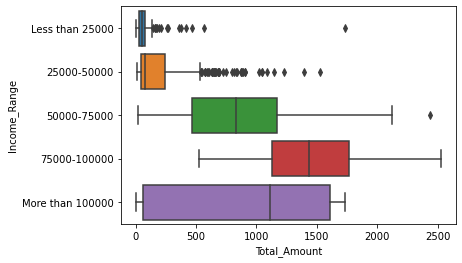

In [21]:
sns.boxplot (x= marketing['Total_Amount'], y= marketing['Income_Range'], orient='h')

The highest average spend is from the people in the range of 50,000 to 100,000 income while people with More than 100,000 income have a really high median making the low spenders an outlier.

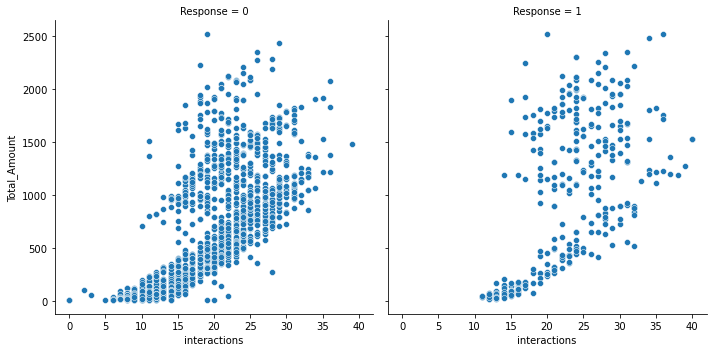

In [22]:
sns.relplot (x= marketing['interactions'], y=marketing['Total_Amount'], kind='scatter', col = marketing['Response'])

Those who have recently responded to the campaign are seen to have interacted more with the organization as well has in overall have spent more in the company.

In [23]:
marketing.describe()

,ID,Income,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response,interactions,Average_Spend
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,53.179603,0.947202,607.075361,12.557310,4.085289,8.472022,0.298285,5.319043,0.009477,0.150271,18.334386,37.454519
std,3249.376275,25173.076661,11.985554,0.749062,602.900476,7.204611,2.740951,5.383960,0.679209,2.425359,0.096907,0.357417,6.852434,30.146362
min,0.000000,1730.000000,26.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,35303.000000,45.000000,0.000000,69.000000,6.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,12.000000,13.000000
50%,5458.500000,51381.500000,52.000000,1.000000,396.500000,12.000000,4.000000,7.000000,0.000000,6.000000,0.000000,0.000000,18.000000,29.783333
75%,8421.750000,68522.000000,63.000000,1.000000,1048.000000,18.000000,6.000000,13.000000,0.000000,7.000000,0.000000,0.000000,24.000000,49.166667
max,11191.000000,666666.000000,129.000000,3.000000,2525.000000,32.000000,27.000000,29.000000,4.000000,20.000000,1.000000,1.000000,40.000000,187.666667


<AxesSubplot:>

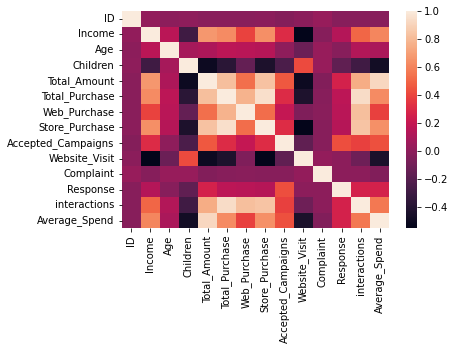

In [24]:
marketing_corr = marketing.corr()
sns.heatmap(marketing_corr)

It makes sense from the above graph that total amount and total purchase have a positive and close correlation along with income also having a positive relation with total purchase and total amount. Another sensible idea we see is that total web visit is completely negatively correlated to website visit but some interesting thing that we see is that website visit an total amount and purchase are also negatively correlated which shows that not much people are buying through website.

In [25]:
marketing.groupby('Income_Range')[['interactions', 'Total_Purchase', 'Total_Amount', 'Average_Spend']].mean()

,interactions,Total_Purchase,Total_Amount,Average_Spend
Income_Range,,,,
Less than 25000,12.776860,5.297521,71.975207,13.000026
25000-50000,14.183374,7.398533,170.545232,17.709254
50000-75000,21.963614,16.898369,847.863237,47.952213
75000-100000,23.601156,19.647399,1450.355491,76.914777
More than 100000,20.307692,17.461538,829.615385,41.277709


From the above table, the people spending most are spending almost double when they earn 75,000 to 100,000 as compared to earning more than 100,000 or between 50,000 to 100,900. Also, people earning 50,000-75,000 are spending more than those earning more than 100,000.

In [26]:
marketing.groupby(['Income_Range', 'Country'])[['Average_Spend','interactions']].max()



Average_Spend  interactions
Income_Range     Country                             
Less than 25000  AUS          19.200000          18.0
                 CA          137.000000          25.0
                 GER          15.000000          16.0
                 IND          32.000000          20.0
                 ME                 NaN           NaN
                 SA           35.923077          21.0
                 SP          186.500000          26.0
                 US           61.785714          29.0
25000-50000      AUS          41.000000          32.0
                 CA           69.800000          34.0
                 GER          44.391304          30.0
                 IND          41.960000          33.0
                 ME           39.727273          32.0
                 SA           72.800000          30.0
                 SP           76.200000          36.0
                 US           40.705882          24.0
50000-75000      AUS         129.800000          33.0
                 CA          127.285714          37.0
                 GER         130.166667          35.0
                 IND         118.428571          33.0
                 ME           78.625000          22.0
                 SA          136.250000          36.0
                 SP          143.090909          39.0
                 US           81.842105          36.0
75000-100000     AUS         151.100000          31.0
                 CA          128.200000          36.0
                 GER         152.888889          39.0
                 IND         111.611111          32.0
                 ME                 NaN           NaN
                 SA          148.529412          34.0
                 SP          187.666667          40.0
                 US          131.250000          32.0
More than 100000 AUS                NaN           NaN
                 CA           42.037037          33.0
                 GER                NaN           NaN
                 IND          73.090909          22.0
                 ME                 NaN           NaN
                 SA           61.785714          35.0
                 SP          107.000000          36.0
                 US           59.206897          29.0

In all the income group, Spain is the country with the most interaction and average spend.

For question 3 related to Insurance visualization

In [27]:
new_insurance = pd.read_csv('insurance.csv')

new_insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
insurance_cutoff = new_insurance['charges'].quantile(0.98)

new_insurance = new_insurance[(new_insurance['charges'] < insurance_cutoff)]

new_insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Removing the top 2 percent of the people paying the highest charges.

In [29]:
insurance_bmi_low = new_insurance['bmi'].quantile(0.02)
insurance_bmi_high = new_insurance['bmi'].quantile(0.98)

new_insurance = new_insurance[(new_insurance['bmi']>insurance_bmi_low)&(new_insurance['bmi']<insurance_bmi_high)]

new_insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Removing the top and bottom 2% of the people who had the highest and lowest BMI.

In [30]:
insurance_dummy = pd.get_dummies(new_insurance, columns=['region'], drop_first=True, prefix='region')

insurance_dummy

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,1


Creating dummy for the region, northeast region has been dropped so when all regions are 0, it means northeast, having 1 under northwest, southeast or southwest means that they belong to that region.

In [31]:
bmi_bin = [-0.01, 18.5, 24.9, 30, np.inf]
bmi_label = ['Underweight', 'Healthy', 'Overweight', 'Obese']

insurance_dummy['healthy'] = pd.cut (insurance_dummy['bmi'], bmi_bin, labels=bmi_label)

insurance_dummy

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,healthy
0,19,female,27.900,0,yes,16884.92400,0,0,1,Overweight
1,18,male,33.770,1,no,1725.55230,0,1,0,Obese
2,28,male,33.000,3,no,4449.46200,0,1,0,Obese
3,33,male,22.705,0,no,21984.47061,1,0,0,Healthy
4,32,male,28.880,0,no,3866.85520,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,Obese
1334,18,female,31.920,0,no,2205.98080,0,0,0,Obese
1335,18,female,36.850,0,no,1629.83350,0,1,0,Obese
1336,21,female,25.800,0,no,2007.94500,0,0,1,Overweight


Creating bin and adding a health column which shows Underweight, Healthy, Overweight and Obese.

In [32]:
insurance_dummy['Child_boolean'] = (insurance_dummy['children'] > 0).astype(int)

insurance_dummy

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,healthy,Child_boolean
0,19,female,27.900,0,yes,16884.92400,0,0,1,Overweight,0
1,18,male,33.770,1,no,1725.55230,0,1,0,Obese,1
2,28,male,33.000,3,no,4449.46200,0,1,0,Obese,1
3,33,male,22.705,0,no,21984.47061,1,0,0,Healthy,0
4,32,male,28.880,0,no,3866.85520,1,0,0,Overweight,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,Obese,1
1334,18,female,31.920,0,no,2205.98080,0,0,0,Obese,0
1335,18,female,36.850,0,no,1629.83350,0,1,0,Obese,0
1336,21,female,25.800,0,no,2007.94500,0,0,1,Overweight,0


Creating a boolean of if someone has a child or not rather than the number of children, anyone with 0 child gets a 0 which means children is a false while 1 means that they have at least one child which is True.

In [33]:
from sklearn.preprocessing import StandardScaler

data_standard_scaler = StandardScaler()

data_standard_scaler.fit(insurance_dummy[['charges']])

insurance_dummy['charges_scaled_standard'] = 0

new_charges = data_standard_scaler.transform(insurance_dummy[['charges']])

insurance_dummy.loc[:, ['charges_scaled_standard']] = new_charges

insurance_dummy

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,healthy,Child_boolean,charges_scaled_standard
0,19,female,27.900,0,yes,16884.92400,0,0,1,Overweight,0,0.401815
1,18,male,33.770,1,no,1725.55230,0,1,0,Obese,1,-0.991592
2,28,male,33.000,3,no,4449.46200,0,1,0,Obese,1,-0.741217
3,33,male,22.705,0,no,21984.47061,1,0,0,Healthy,0,0.870551
4,32,male,28.880,0,no,3866.85520,1,0,0,Overweight,0,-0.794769
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,Obese,1,-0.175827
1334,18,female,31.920,0,no,2205.98080,0,0,0,Obese,0,-0.947432
1335,18,female,36.850,0,no,1629.83350,0,1,0,Obese,0,-1.000390
1336,21,female,25.800,0,no,2007.94500,0,0,1,Overweight,0,-0.965635


In [34]:

data_standard_scaler = StandardScaler()

data_standard_scaler.fit(insurance_dummy[['age']])

insurance_dummy['age_scaled_standard'] = 0

new_age = data_standard_scaler.transform(insurance_dummy[['age']])

insurance_dummy.loc[:, ['age_scaled_standard']] = new_age

insurance_dummy

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,healthy,Child_boolean,charges_scaled_standard,age_scaled_standard
0,19,female,27.900,0,yes,16884.92400,0,0,1,Overweight,0,0.401815,-1.433422
1,18,male,33.770,1,no,1725.55230,0,1,0,Obese,1,-0.991592,-1.505073
2,28,male,33.000,3,no,4449.46200,0,1,0,Obese,1,-0.741217,-0.788562
3,33,male,22.705,0,no,21984.47061,1,0,0,Healthy,0,0.870551,-0.430306
4,32,male,28.880,0,no,3866.85520,1,0,0,Overweight,0,-0.794769,-0.501957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,0,Obese,1,-0.175827,0.787763
1334,18,female,31.920,0,no,2205.98080,0,0,0,Obese,0,-0.947432,-1.505073
1335,18,female,36.850,0,no,1629.83350,0,1,0,Obese,0,-1.000390,-1.505073
1336,21,female,25.800,0,no,2007.94500,0,0,1,Overweight,0,-0.965635,-1.290120


Creating a scalar for charges and age according to the standard scalar avaiable in sklearn.preprocessing.